In [3]:
import dill
dill.load_session('C:/Users//ress/Desktop/Università/FAD/Passatempo/GV/FAD_project/notebook_env.db')

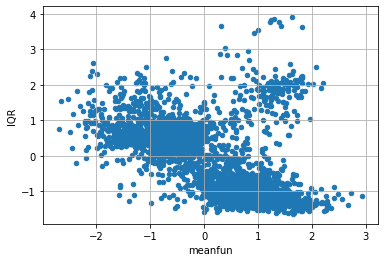

In [4]:
from matplotlib import pyplot as plt
dataz.plot(x="meanfun",y="IQR",kind="scatter")
plt.grid()
plt.show()

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_train[["meanfun","IQR"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
aux=pd.DataFrame({"X":data["meanfun"],"Y":data["IQR"],"C":data["label"]})

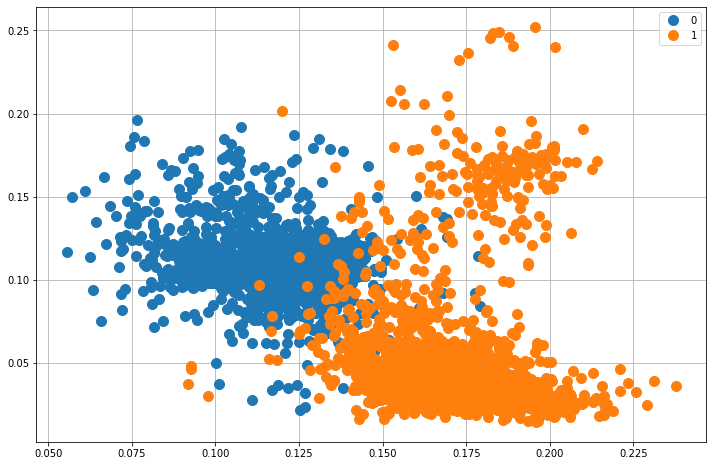

In [7]:
def plot2d(data):
    classes = sorted(data.C.unique())
    for c in classes:
        plt.plot(data.where(data.C==c).dropna().X.values,
                 data.where(data.C==c).dropna().Y.values,'o', markersize=10, label=str(c))

plt.figure(figsize=(12,8))
plot2d(aux)
plt.legend()
plt.grid()
plt.show()

In [8]:
def plot_kmeans_decision_boundary(data, kmeans):
    plot2d(data)
    X = np.linspace(data.X.min(), data.X.max(),200)
    Y = np.linspace(data.Y.min(), data.Y.max(),200)
    X,Y = np.meshgrid(X,Y)
    
    Z = kmeans.predict(np.c_[X.ravel(), Y.ravel()])
    
    Z = np.array(Z).reshape(X.shape)
    
    plt.pcolormesh(X, Y, Z, antialiased=True, cmap='Set3')
    
    centers = kmeans.cluster_centers_
    
    plt.plot(centers[:,0],centers[:,1],'kX',markersize=10,label='centroids')

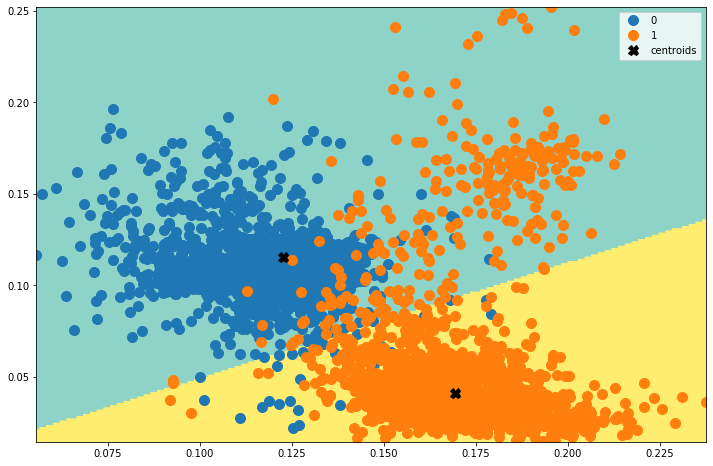

In [9]:
plt.figure(figsize=(12,8))
plot_kmeans_decision_boundary(aux,kmeans)
plt.legend()
plt.show()

In [10]:
probs=kmeans.predict(data_test[["meanfun","IQR"]])
test_gt = data_test.dropna()['label']
confusion_matrix(test_gt, probs)

array([[381,  10],
       [ 79, 322]], dtype=int64)

In [11]:
print("\nClassification Report\n",classification_report(test_gt, probs))


Classification Report
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       391
           1       0.97      0.80      0.88       401

    accuracy                           0.89       792
   macro avg       0.90      0.89      0.89       792
weighted avg       0.90      0.89      0.89       792



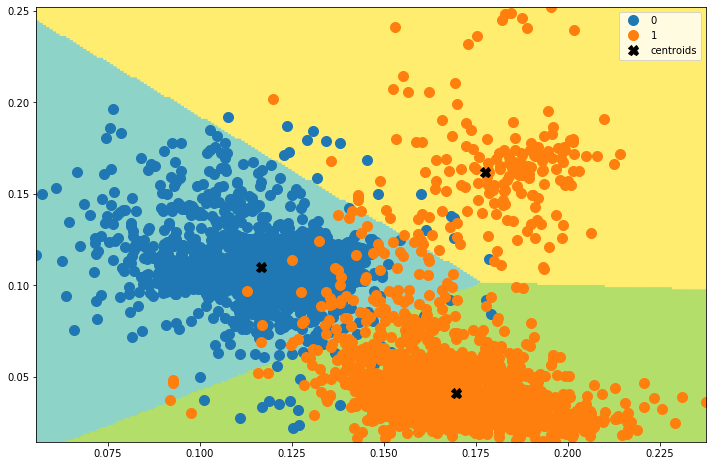

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_train[["meanfun","IQR"]])
plt.figure(figsize=(12,8))
plot_kmeans_decision_boundary(aux,kmeans)
plt.legend()
plt.show()

<h1>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_train.drop(columns="label"))
cluster_test=kmeans.predict(data_test.drop(columns="label"))
test_gt = data_test.dropna()['label']
print("\nClassification Report\n",classification_report(test_gt, probs))


Classification Report
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       391
           1       0.97      0.80      0.88       401

    accuracy                           0.89       792
   macro avg       0.90      0.89      0.89       792
weighted avg       0.90      0.89      0.89       792



<h1> Without outliers

In [14]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_clean_train[["meanfun","IQR"]])
aux=pd.DataFrame({"X":data_clean["meanfun"],"Y":data_clean["IQR"],"C":data_clean["label"]})


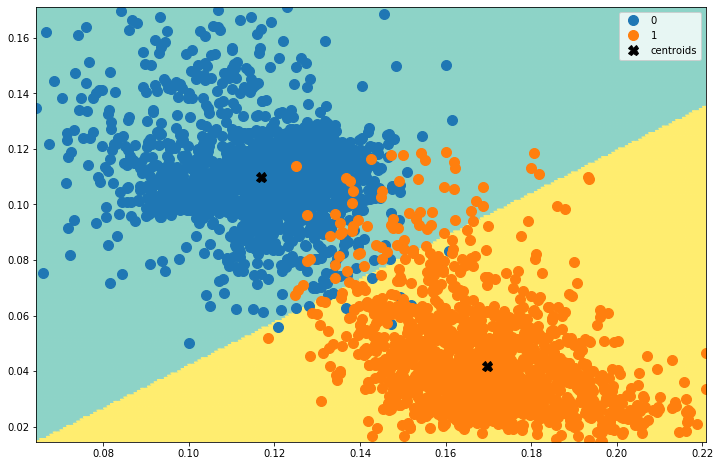

In [15]:
plt.figure(figsize=(12,8))
plot_kmeans_decision_boundary(aux,kmeans)
plt.legend()
plt.show()

In [16]:
probs=kmeans.predict(data_clean_test[["meanfun","IQR"]])
print("Classification Report\n",classification_report(data_clean_test.label,probs))

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       382
           1       0.98      0.96      0.97       350

    accuracy                           0.97       732
   macro avg       0.97      0.97      0.97       732
weighted avg       0.97      0.97      0.97       732



In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_clean_train.drop(columns="label"))
cluster_test=kmeans.predict(data_clean_test.drop(columns="label"))
test_gt = data_clean_test.dropna()['label']
print("\nClassification Report\n",classification_report(data_clean_test.label, probs))


Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       382
           1       0.98      0.96      0.97       350

    accuracy                           0.97       732
   macro avg       0.97      0.97      0.97       732
weighted avg       0.97      0.97      0.97       732



In [19]:
dill.dump_session('C:/Users//ress/Desktop/Università/FAD/Passatempo/GV/FAD_project/notebook_env.db')